# Comparación estadística de Energía de señales EEG

### 1. Implemente una función que reciba una señal de múltiples canales y épocas y calcule la Energía de promedio de cada canal.



*(Debemos tener en cuenta que las filas de la señal son las muestras y las columnas son los canales)*

In [83]:
import numpy as np
import scipy.io as sio

def EnergiaProm(signal): #Recibe una señal con la forma: (Canales, muestras, épocas)
    Energia = np.square(signal)#Primero se le calcula el cuadrado a todos los elementos de la señal
    
    # Promedio en el eje de muestras (por época)
    EnergiaEpoca = np.sum(np.square(signal), axis=1) # Se calcula la energia total por canal y epoca
    # Promedio sobre las épocas
    EnergiaPromedio = np.mean(EnergiaEpoca, axis=1) #Se calcula el promedio por canal
    
    return EnergiaPromedio

### 2. Calcule la energía de cada canal promediada por épocas para cada sujeto, esto para ambos grupos poblacionales. Guarde esta información en un DataFrame de columnas ‘canal’ y filas ‘#sujeto’ con los valores de energía calculados, un DataFrame para cada grupo poblacional.

In [84]:
# Importamos las librerias que vamos a necesitar

import os
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
# Listar archivos en cada carpeta
control = os.listdir('../Data/control')
parkinson = os.listdir('../Data/parkinson')

# Carpeta Control
# Imprimimos los archivos que contiene cada carpeta y la cantidad de archivos
print("Archivos en carpeta control:", control) 
print("El archivo control contiene la información de",len(control), "sujetos.") #Se muestra el número de archivos asociados a cada sujeto.

# Carpeta parkinson
# Imprimimos los archivos que contiene cada carpeta y la cantidad de archivos
print("\nArchivos en carpeta parkinson:", parkinson)
print("El archivo parkinson contiene la información de",len(parkinson), "sujetos.") #Se muestra el número de archivos asociados a cada sujeto.

Archivos en carpeta control: ['C001R_EP_reposo.mat', 'C002_EP_reposo.mat', 'C004_EP_reposo.mat', 'C005_EP_reposo_Repetido.mat', 'C006_EP_reposo.mat', 'C007_EP_reposo.mat', 'C010_EP_reposo.mat', 'C011_EP_reposo.mat', 'C012_EP_reposo.mat', 'C013_EP_reposo.mat', 'C015_EP_reposo.mat', 'C018_EP_reposo.mat', 'C019_EP_reposo.mat', 'C020_EP_reposo.mat', 'C021_EP_reposo.mat', 'C023_EP_reposo.mat', 'C024_EP_reposo.mat', 'C025_EP_reposo.mat', 'C026_EP_reposo.mat', 'C027_EP_reposo.mat', 'C028_EP_reposo.mat', 'C029_EP_reposo.mat', 'C030_EP_reposo.mat', 'C031_EP_reposo.mat', 'C032_EP_reposo.mat', 'C033R_EP_reposo.mat', 'C034_EP_reposo.mat', 'C036_EP_reposo.mat', 'C037_EP_reposo.mat', 'C040_EP_reposo.mat', 'C041_EP_reposo.mat', 'C042_EP_reposo.mat', 'C044_EP_reposo.mat', 'C045_EP_reposo.mat', 'C046_EP_reposo.mat', 'C049_EP_reposo.mat']
El archivo control contiene la información de 36 sujetos.

Archivos en carpeta parkinson: ['P001_EP_reposo.mat', 'P004_EP_reposo.mat', 'P005_EP_reposo.mat', 'P007_EP_r

In [86]:
# Cargamos la ruta del archivo control y parkinson
archivo_control = control[0]
ruta_Control = os.path.join('../Data/control', archivo_control)

archivo_parkinson = parkinson[0]
ruta_Parkinson = os.path.join('../Data/parkinson', archivo_parkinson)

# Cargamos el archivo
dataControl = sio.loadmat(ruta_Control)
dataParkinson = sio.loadmat(ruta_Parkinson)




In [87]:
# Estraemos las llaves de los archivos
dataControl.keys() #Observamos las claves del archivo

dict_keys(['__header__', '__version__', '__globals__', 'data'])

Las dimensiones son:  (8, 2000, 180)


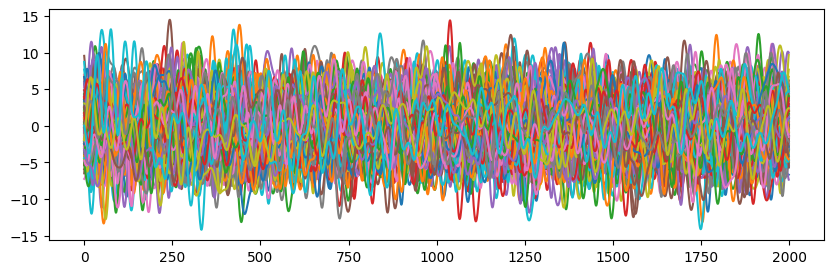

In [88]:
# Accedemos a 'data' que es quien tiene la información de las señales
signal = dataControl['data']

#Miramos las dimensiones
print("Las dimensiones son: ", signal.shape)
# El orden de las dimensiones es: (canales, muestras, épocas)

signal

# Además visualizamos la señal
fig=plt.figure(figsize=(10,3))
plt.plot(signal[0,0:2000])
plt.show()

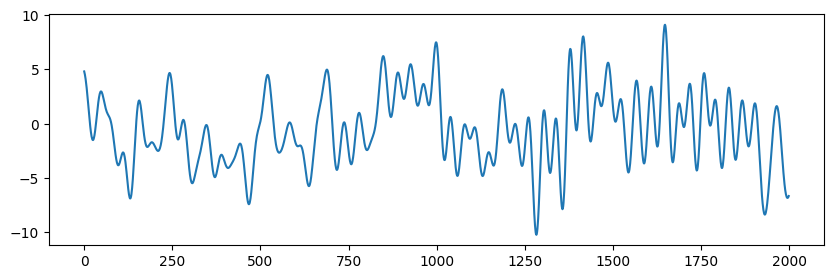

In [89]:
# Debido a que la señal tiene 3 dimensiones se muestra se esa manera, por lo que debemos redimensionar con reshape para que quede en una señal de 2 dimensiones
# Como tenemos que las dimensiones son: (8, 2000, 180), quedarían como: (8, 2000*180)

signal2d=np.reshape(signal,(signal.shape[0],signal.shape[1]*signal.shape[2]),order="F")
# Visualizamos las dimensiones
signal2d.shape

#Se visualiza la señal redimensionada
fig=plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.plot(signal2d[0,0:2000])
plt.show()

In [90]:
# Accedemos a las llaves del archivo de parkinson
dataParkinson.keys() #Observamos las claves del archivo

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [91]:
Energia_Control = {}
print(len(control))

# Recorremos el archivo control para calcular la energía promedio
for i in range(len(control)):
    # Cargamos la ruta del archivo control y parkinson
    archivo_control = control[i]
    ruta_Control = os.path.join('../Data/control', archivo_control)
    data = sio.loadmat(ruta_Control)
    signal = data["data"]
    energia_promedio = EnergiaProm(signal)
    Energia_Control[f'Sujeto {i+1}'] = energia_promedio


36


In [92]:
print(signal.shape)
Canales = [f'Canal {i+1}' for i in range(signal.shape[0])] #Shape[0], o sea la posiciòn cero de shape, que corresponde al nùmero de canales = 8
df_control = pd.DataFrame.from_dict(Energia_Control, orient='index', columns=Canales)

print("Energía por épocas y canales de los sujetos en el archivo de Control")

display(df_control)

(8, 2000, 184)
Energía por épocas y canales de los sujetos en el archivo de Control


,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
Sujeto 1,21465.650358,20985.907912,22760.149588,18505.640284,29730.163026,25244.158073,22781.327587,24658.599512
Sujeto 2,15966.402868,17617.810248,20804.937129,19654.400017,16678.982063,93894.049009,66862.496275,75685.125872
Sujeto 3,14148.673322,18283.999666,28749.932148,14270.726911,28787.445978,14661.417740,15940.154095,19499.898656
Sujeto 4,35311.301696,34916.686010,38800.429029,35427.031127,35905.472869,106598.128152,106885.575966,112520.750636
Sujeto 5,18510.829979,19738.489375,20911.792748,21828.254399,23351.992649,53086.059766,37495.972475,43067.095504
Sujeto 6,13180.109317,13925.217812,16218.994223,12324.883659,14060.300659,25767.024864,21935.759622,22827.781293
Sujeto 7,11197.554574,10948.368805,12737.004665,10745.161921,10329.642418,21461.605831,15493.212776,27414.375247
Sujeto 8,28551.124065,26204.839254,17383.998956,17244.605933,26206.372422,83370.618408,51121.105722,67852.348256
Sujeto 9,9133.036290,9214.155028,11626.411811,10809.621612,10467.879938,46336.873547,45695.801756,50086.361637
Sujeto 10,47166.556798,55107.798641,52286.884667,34682.656928,30606.119338,227045.733387,224891.029478,322172.431642


## Ahora Repetimos lo mismo pero para el archivo de parkinson

In [93]:
Energia_Parkinson = {}
print(len(parkinson))

# Recorremos el archivo parkinson para calcular la energía promedio
for i in range(len(parkinson)):
    # Cargamos la ruta del archivo control y parkinson
    archivo_parkinson = parkinson[i]
    ruta_Parkinson = os.path.join('../Data/parkinson', archivo_parkinson)
    data2 = sio.loadmat(ruta_Parkinson)
    signal2 = data2["data"]
    energia_promedio = EnergiaProm(signal2)
    Energia_Parkinson[f'Sujeto {i+1}'] = energia_promedio



23


In [94]:
# Miramos las dimensiones se signal, la cual corresponde a (canales, muestras, època)
print(signal2.shape)

(8, 2000, 170)


In [95]:
Canales = [f'Canal {i+1}' for i in range(signal2.shape[0])] #Uitilizamos signal.shape en la posiciòn 0 que corresponde al nùmero de canales     
df_parkinson = pd.DataFrame.from_dict(Energia_Parkinson, orient='index', columns=Canales)

print("Energía por épocas y canales de los sujetos en el archivo de Parkinson")

display(df_parkinson)


Energía por épocas y canales de los sujetos en el archivo de Parkinson


,Canal 1,Canal 2,Canal 3,Canal 4,Canal 5,Canal 6,Canal 7,Canal 8
Sujeto 1,12438.243570,11261.175800,10819.634775,9489.784462,12091.060945,22798.213463,23700.620349,25606.065340
Sujeto 2,17995.660058,12001.601821,12286.344400,14785.908284,17058.433161,63983.449318,53715.460772,66403.639479
Sujeto 3,38092.102574,43575.379457,41979.994799,41715.287990,46513.737045,251649.394709,179345.438488,262361.180410
Sujeto 4,23742.325612,22070.007569,24540.315612,21803.936448,22594.339745,128314.264805,128888.485633,152799.284248
Sujeto 5,48574.518921,51806.529769,73171.952374,59707.699631,56552.175747,287105.761622,222745.793414,353312.298104
Sujeto 6,16202.416566,13124.247855,13988.674335,12752.027365,15784.724049,50730.233172,50742.237835,73694.061647
Sujeto 7,10692.948223,10841.187262,12154.390086,24161.685202,14789.173543,43302.825848,42560.941845,39043.973220
Sujeto 8,12157.229828,13398.658526,17668.877657,14841.104693,11297.742247,38701.647608,41828.973929,61328.610990
Sujeto 9,9581.810471,14008.572615,9589.230257,9374.085669,8154.941858,28970.848994,40705.897395,36624.858559
Sujeto 10,23658.738825,23990.255991,30633.745996,22888.894132,19932.315538,65161.432397,60552.834862,58441.048743


### 3. Análisis estadístico comparativo entre grupos (control vs Parkinson)

Para determinar si existen diferencias estadísticamente significativas en la energía promedio de los canales EEG entre los grupos control y Parkinson, se realizó un análisis comparativo canal por canal.

Primero, se comprobó si las energías promedio seguían una distribución normal en ambos grupos mediante la prueba de **Shapiro-Wilk**. Luego, se evaluó si existía igualdad de varianzas con la prueba de **Levene**.

Cuando ambos supuestos se cumplieron, se aplicó la **prueba t de Student para muestras independientes**. En caso contrario, se utilizó la **prueba no paramétrica U de Mann-Whitney**. Se consideró un resultado estadísticamente significativo cuando *p* < 0.05.

Los resultados se organizaron en una tabla donde se detallan: el canal evaluado, la prueba utilizada, el valor *p*, y si el canal mostró diferencias significativas entre los grupos. Este análisis permite identificar qué canales contienen diferencias relevantes en energía, y por tanto, potencialmente útiles para discriminar entre sujetos con y sin enfermedad de Parkinson.

Los resultados fueron guardados en un archivo CSV titulado `resultado_estadistico_energia_EEG.csv` para su posterior análisis.

In [96]:
# Librerías necesarias
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
import pandas as pd

# Función para aplicar Shapiro-Wilk a todos los canales y devolver un DataFrame
def Prueba_ShapiroWilks_df(df, alpha=0.05):
    resultados = []
    for canal in df.columns:
        stat, p_value = shapiro(df[canal])
        conclusion = "Distribución normal" if p_value >= alpha else "No normal"
        resultados.append({
            "Canal": canal,
            "Estadístico": round(stat, 4),
            "p-valor": round(p_value, 6),
            "Conclusión": conclusion
        })
    return pd.DataFrame(resultados)

# Aplicamos prueba de normalidad a ambos grupos
shapiro_control = Prueba_ShapiroWilks_df(df_control)
shapiro_parkinson = Prueba_ShapiroWilks_df(df_parkinson)

# Mostramos resultados (opcional para presentación)
print("Prueba de Normalidad - Grupo Control:")
display(shapiro_control)

print("Prueba de Normalidad - Grupo Parkinson:")
display(shapiro_parkinson)


Prueba de Normalidad - Grupo Control:


,Canal,Estadístico,p-valor,Conclusión
0,Canal 1,0.9095,0.006253,No normal
1,Canal 2,0.9023,0.003954,No normal
2,Canal 3,0.9148,0.008902,No normal
3,Canal 4,0.8506,0.000197,No normal
4,Canal 5,0.8759,0.000800,No normal
5,Canal 6,0.7778,0.000006,No normal
6,Canal 7,0.7692,0.000004,No normal
7,Canal 8,0.7171,0.000001,No normal


Prueba de Normalidad - Grupo Parkinson:


,Canal,Estadístico,p-valor,Conclusión
0,Canal 1,0.8880,0.014392,No normal
1,Canal 2,0.8620,0.004522,No normal
2,Canal 3,0.8228,0.000910,No normal
3,Canal 4,0.7944,0.000312,No normal
4,Canal 5,0.8658,0.005323,No normal
5,Canal 6,0.6880,0.000010,No normal
6,Canal 7,0.7059,0.000017,No normal
7,Canal 8,0.6849,0.000009,No normal


In [98]:
# Creamos una tabla para mostrar los resultados 
resultados = []

# Recorremos cada canal (misma estructura en ambos grupos)
for canal in df_control.columns:
    energia_control = df_control[canal]
    energia_parkinson = df_parkinson[canal]

    # Buscamos p-valores de Shapiro
    p_control = shapiro_control.loc[shapiro_control["Canal"] == canal, "p-valor"].values[0]
    p_park = shapiro_parkinson.loc[shapiro_parkinson["Canal"] == canal, "p-valor"].values[0]

    # Prueba de homocedasticidad de normalidad y varianzas
    normal = p_control > 0.05 and p_park > 0.05
    _, p_levene = levene(energia_control, energia_parkinson)
    varianza_igual = p_levene > 0.05     

    # Selección de prueba estadística
    if normal and varianza_igual:
        prueba = "T-test (independiente)"
        _, p_valor = ttest_ind(energia_control, energia_parkinson, equal_var=True)
    else:
        prueba = "Mann-Whitney U"
        _, p_valor = mannwhitneyu(energia_control, energia_parkinson, alternative='two-sided')

    diferencia = "Sí" if p_valor < 0.05 else "No"   # Si p_valor > 0.05 → Se asume homocedasticidad (varianzas iguales)
                                                    # Si p_valor <= 0.05 → Se asume Varianzas diferentes (heterocedasticidad)

    # Guardamos los resultados
    resultados.append({
        "Canal": canal,
        "Prueba usada": prueba,
        "p-valor": round(p_valor, 4),
        "Normalidad Control (p)": round(p_control, 4),
        "Normalidad Parkinson (p)": round(p_park, 4),
        "Varianzas iguales (p)": round(p_levene, 4),
        "¿Diferencia significativa?": diferencia
    })

# Mostramos los resultados como DataFrame
df_resultados = pd.DataFrame(resultados)

# Mostramos los resultados completos y las diferencias significativas
print(" Resultados del análisis estadístico por canal:")
display(df_resultados)

print("\n Canales con diferencias significativas (p < 0.05):")
display(df_resultados[df_resultados["¿Diferencia significativa?"] == "Sí"])

# Guardamos resultados como CSV
df_resultados.to_csv("resultado_estadistico_energia_EEG.csv", index=False)


 Resultados del análisis estadístico por canal:


,Canal,Prueba usada,p-valor,Normalidad Control (p),Normalidad Parkinson (p),Varianzas iguales (p),¿Diferencia significativa?
0,Canal 1,Mann-Whitney U,0.4057,0.0063,0.0144,0.8848,No
1,Canal 2,Mann-Whitney U,0.5705,0.0040,0.0045,0.9591,No
2,Canal 3,Mann-Whitney U,0.4604,0.0089,0.0009,0.9776,No
3,Canal 4,Mann-Whitney U,0.2345,0.0002,0.0003,0.7593,No
4,Canal 5,Mann-Whitney U,0.5600,0.0008,0.0053,0.9046,No
5,Canal 6,Mann-Whitney U,0.2801,0.0000,0.0000,0.4720,No
6,Canal 7,Mann-Whitney U,0.1183,0.0000,0.0000,0.6179,No
7,Canal 8,Mann-Whitney U,0.1505,0.0000,0.0000,0.5941,No



 Canales con diferencias significativas (p < 0.05):


,Canal,Prueba usada,p-valor,Normalidad Control (p),Normalidad Parkinson (p),Varianzas iguales (p),¿Diferencia significativa?
